In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [3]:
#EDA

In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [7]:
from sklearn.metrics import classification_report, accuracy_score

In [8]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    
    train = model.score(xtrain,ytrain)
    test = model.score(xtest,ytest)
    
    print(f"Train Accuracy : {train}\nTest Accuracy : {test}")
    print(classification_report(ytest,ypred))
    return model

In [9]:
knn = mymodel(KNeighborsClassifier())

Train Accuracy : 0.81889159093818
Test Accuracy : 0.7539564048969841
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1760
           1       0.75      0.72      0.74      1589

    accuracy                           0.75      3349
   macro avg       0.75      0.75      0.75      3349
weighted avg       0.75      0.75      0.75      3349



In [11]:
logreg = mymodel(LogisticRegression())

Train Accuracy : 0.7556636375271982
Test Accuracy : 0.7653030755449388
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1760
           1       0.77      0.73      0.75      1589

    accuracy                           0.77      3349
   macro avg       0.77      0.76      0.76      3349
weighted avg       0.77      0.77      0.76      3349



In [13]:
svm = mymodel(SVC())

Train Accuracy : 0.7382567515678996
Test Accuracy : 0.7414153478650344
              precision    recall  f1-score   support

           0       0.72      0.84      0.77      1760
           1       0.78      0.63      0.70      1589

    accuracy                           0.74      3349
   macro avg       0.75      0.74      0.74      3349
weighted avg       0.75      0.74      0.74      3349



In [15]:
dt = mymodel(DecisionTreeClassifier())

Train Accuracy : 1.0
Test Accuracy : 0.7876978202448492
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1760
           1       0.78      0.77      0.78      1589

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [18]:
knn = mymodel(KNeighborsClassifier())

Train Accuracy : 0.8466658133879432
Test Accuracy : 0.7748581666169005
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1760
           1       0.78      0.73      0.76      1589

    accuracy                           0.77      3349
   macro avg       0.78      0.77      0.77      3349
weighted avg       0.78      0.77      0.77      3349



In [19]:
logreg = mymodel(LogisticRegression())

Train Accuracy : 0.7973889671061052
Test Accuracy : 0.7975515079128098
              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.77      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [20]:
svm = mymodel(SVC())

Train Accuracy : 0.8447459362600793
Test Accuracy : 0.8163630934607345
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1760
           1       0.79      0.84      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [21]:
dt = mymodel(DecisionTreeClassifier())

Train Accuracy : 1.0
Test Accuracy : 0.783517467900866
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1760
           1       0.78      0.76      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



#### HYPERMARAMETER TUNING

In [23]:
dt1 = mymodel(DecisionTreeClassifier(max_depth=10))

Train Accuracy : 0.8992704466914118
Test Accuracy : 0.8175574798447298
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1760
           1       0.81      0.81      0.81      1589

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349



In [24]:
for i in range(1,50):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(xtrain,ytrain)
    train = dt.score(xtrain,ytrain)
    test = dt.score(xtest,ytest)
print(f"{i} {train} {test}")

49 1.0 0.78501045088086


### GridSearchCV

In [25]:
list(range(1,50,5))

[1, 6, 11, 16, 21, 26, 31, 36, 41, 46]

In [26]:
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":list(range(1,50,5)),
    "min_samples_leaf":list(range(1,50,5))
}

In [28]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DecisionTreeClassifier(),parameters,verbose=2)
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=1; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ....criterion=gini, max_depth=1, min_samples_leaf=6; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_leaf=11; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46],
                         'min_samples_leaf': [1, 6, 11, 16, 21, 26, 31, 36, 41,
                                              46]},
             verbose=2)

In [29]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 16, 'min_samples_leaf': 31}

In [30]:
grid.best_score_

0.8261899086018467

In [31]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=16, min_samples_leaf=31)

In [32]:
dt = mymodel(grid.best_estimator_)

Train Accuracy : 0.847561756047613
Test Accuracy : 0.8262167811286951
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1760
           1       0.80      0.85      0.82      1589

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [33]:
from sklearn import tree

[Text(493.6617553710937, 786.2785714285714, 'duration <= -0.476\ngini = 0.499\nsamples = 7813\nvalue = [4113, 3700]'),
 Text(225.0050537109375, 728.0357142857142, 'pdays <= -0.224\ngini = 0.325\nsamples = 3136\nvalue = [2495, 641]'),
 Text(145.725732421875, 669.7928571428571, 'age <= 1.631\ngini = 0.247\nsamples = 2456\nvalue = [2101, 355]'),
 Text(121.98076171874999, 611.55, 'month <= 1.278\ngini = 0.221\nsamples = 2375\nvalue = [2075, 300]'),
 Text(95.41582031249999, 553.3071428571428, 'month <= -1.541\ngini = 0.197\nsamples = 2308\nvalue = [2052, 256]'),
 Text(63.2109375, 495.0642857142857, 'housing <= 0.043\ngini = 0.5\nsamples = 115\nvalue = [58, 57]'),
 Text(56.2359375, 436.82142857142856, 'day <= 0.092\ngini = 0.346\nsamples = 63\nvalue = [14, 49]'),
 Text(49.2609375, 378.5785714285714, 'gini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(63.2109375, 378.5785714285714, 'gini = 0.412\nsamples = 31\nvalue = [9, 22]'),
 Text(70.1859375, 436.82142857142856, 'gini = 0.26\nsamples = 

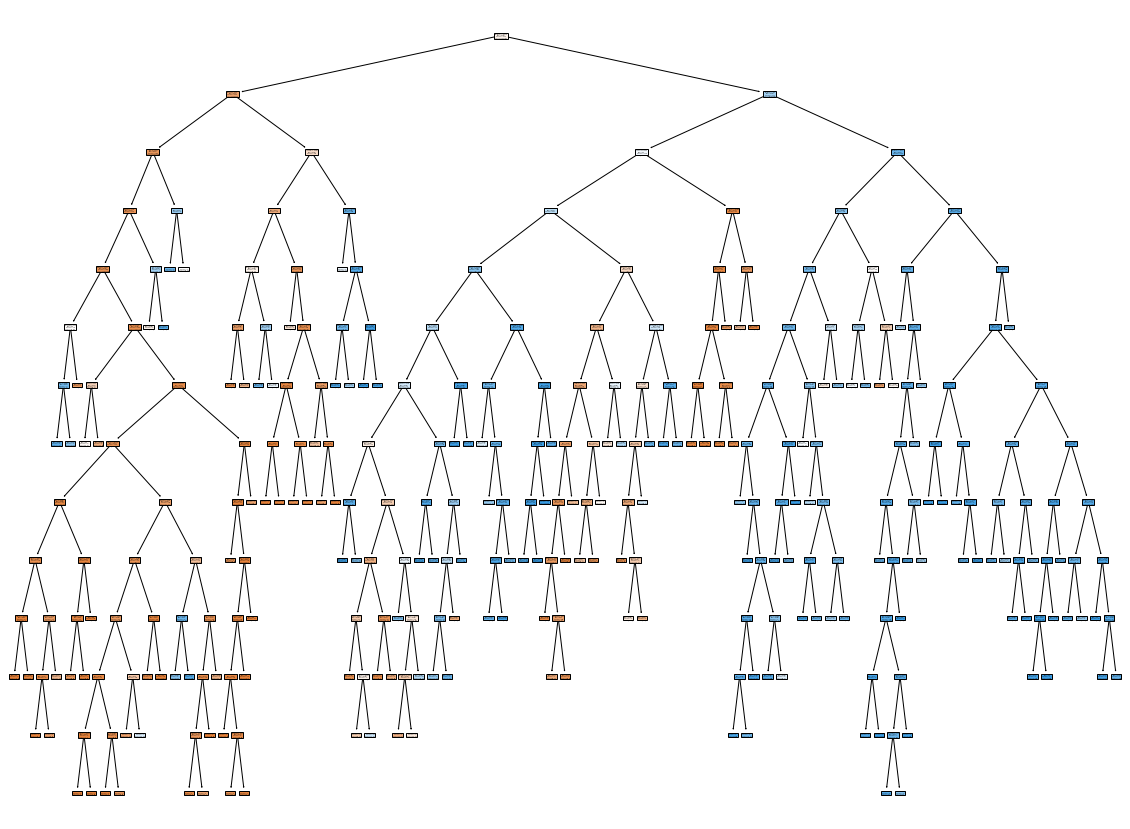

In [34]:
fig,ax = plt.subplots(figsize=(20,15))
tree.plot_tree(dt,feature_names=df.columns, filled=True)